In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

In [3]:
df = pd.read_csv("Iris.csv")
print(df.shape)
df.head()

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Id"],axis=1,inplace=True)

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]].values
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
y = df["Species"]

In [8]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_trainset.shape)
print(y_trainset.shape)
print(X_testset.shape)
print(y_testset.shape)

(105, 4)
(105,)
(45, 4)
(45,)


In [9]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [10]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [11]:
predTree = drugTree.predict(X_testset)

In [41]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9111111111111111


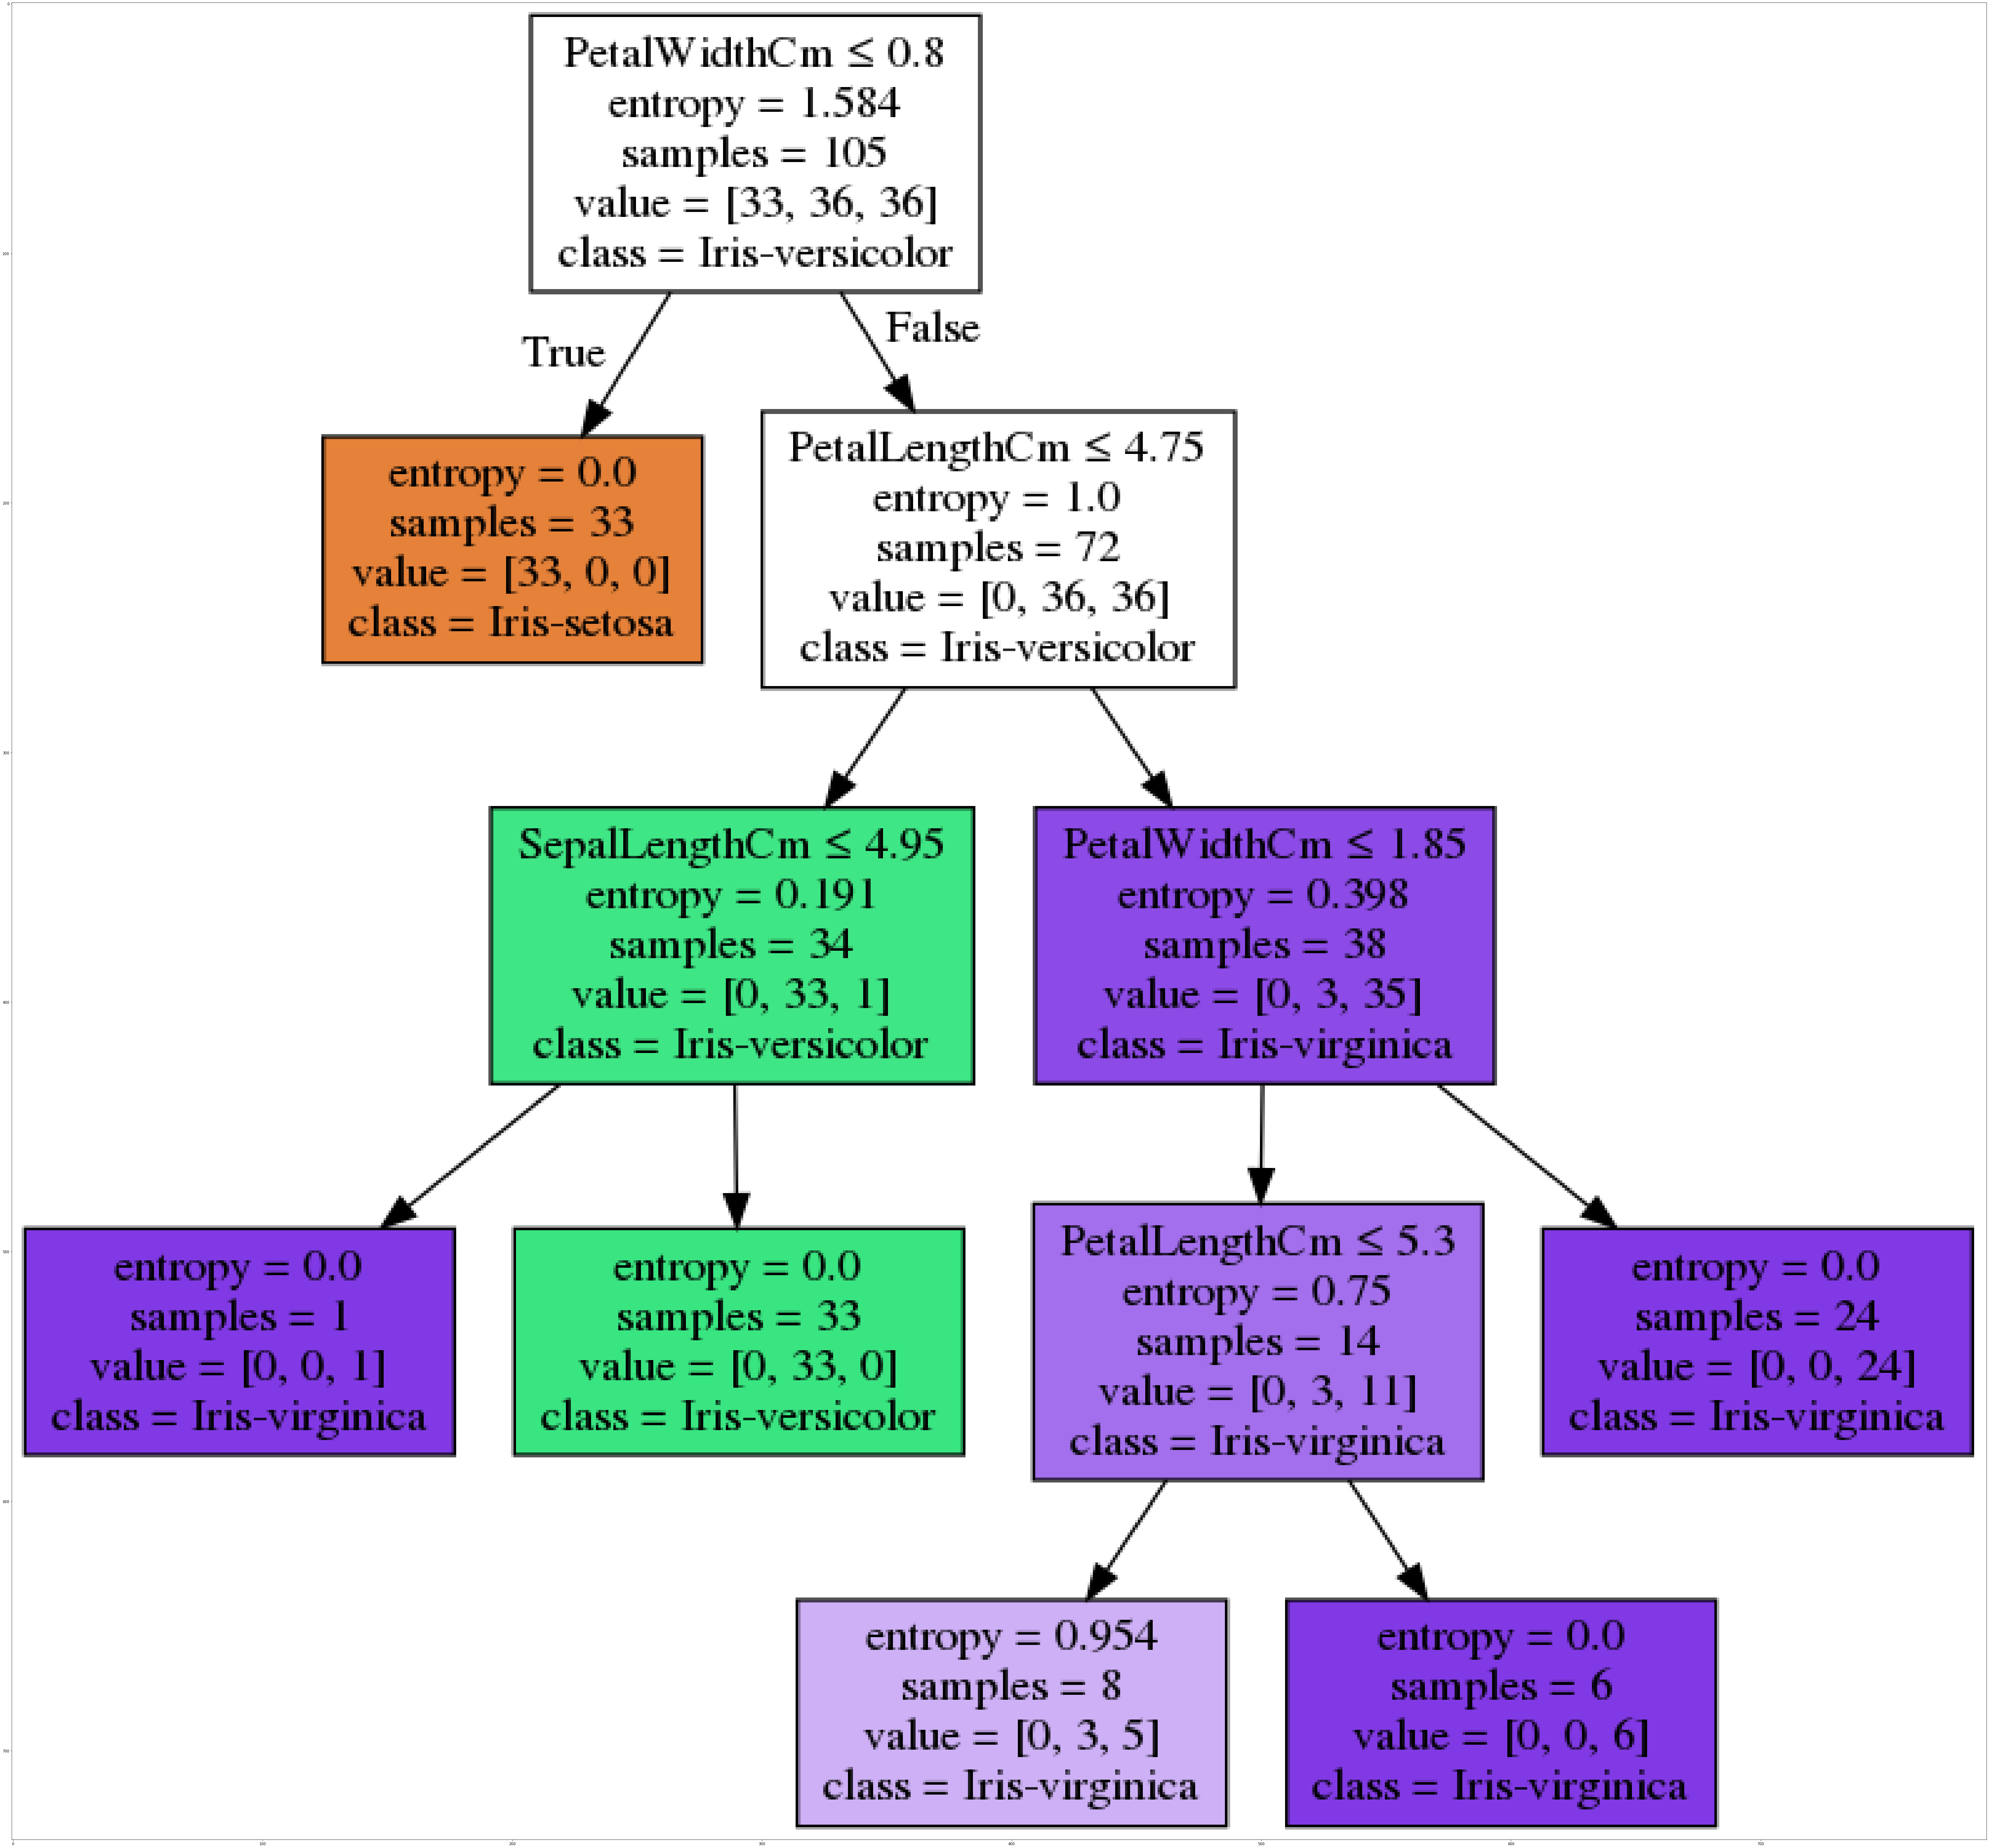

In [42]:
from sklearn.tree import export_graphviz

dot_data = StringIO()
filename = "drugtree.png"
featureNames = df.columns[0:4]
targetNames = df["Species"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [43]:
#Now for prodiction on random data

In [46]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
# Using the trained model for the prediction on mean values of all features

drugTree.predict([[5.84,3.05,3.75,1.19]])  

array(['Iris-versicolor'], dtype=object)

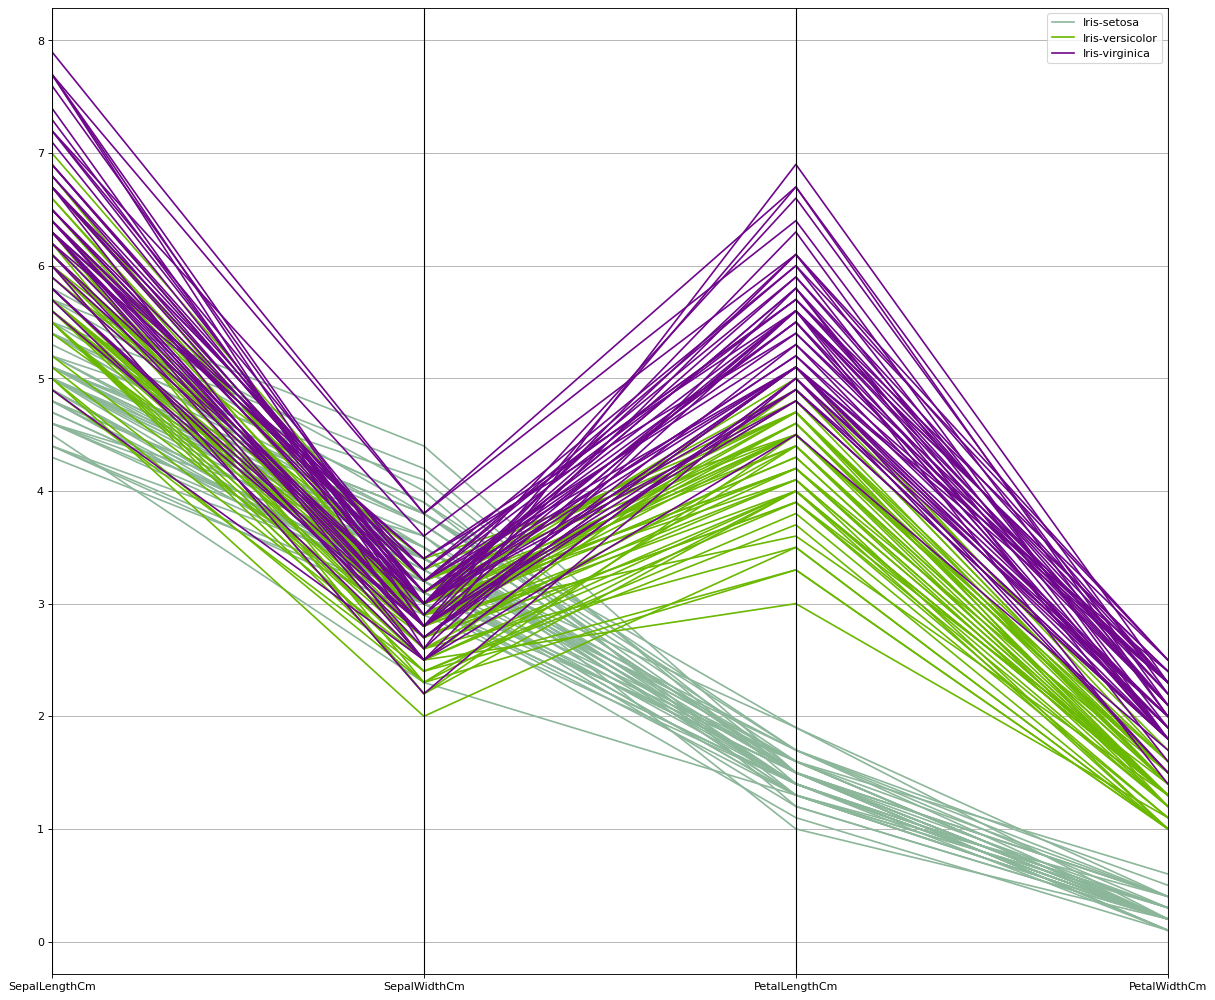

In [48]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.style.use('seaborn-colorblind')
pd.plotting.parallel_coordinates(df, 'Species');

In [49]:
#From the above representation we can see that Iris-Versicolor is around the middle, so our prediction 
# for mean data is correct.